# library required

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import pickle

In [4]:
import pandas as pd
import datetime
import re
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS


import nltk
from nltk.stem.porter import *
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/niloofar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Explatory Analysis

In [5]:
df=pd.read_csv("/Users/niloofar/Downloads/Hotel_Reviews.csv")

# total number of hotels:

len(set(df.Hotel_Name))
df.Hotel_Name.value_counts()

#change the format of time to datetime

df['Review_Date']=pd.to_datetime(df['Review_Date'], format='%m/%d/%Y')

In [6]:
#Selecting one sample hotel with highest number of review
df1=df[df.Hotel_Name=="Britannia International Hotel Canary Wharf"]

df1.index = range(df1.shape[0])

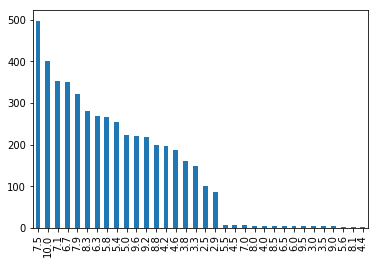

In [7]:
df1['Reviewer_Score'].value_counts().plot(kind='bar')

# Data pre-processing for textual variables

In [8]:
df1=df

In [9]:
import pandas as pd
data_text = pd.DataFrame(df1['Positive_Review'])
data_text['Neg'] = df1['Negative_Review']
data_text['index'] = data_text.index
data_text.columns=['pos','neg','index']
data_text['pos']=["  " if x == 'No Positive' else x for x in data_text['pos']]
data_text['neg']=["  " if x == 'No Negative' else x for x in data_text['neg']]
# data_text['review']=data_text['pos']+data_text['neg']
# df=data_text['review']

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [11]:
docp=list(sent_to_words(data_text['pos']))
docn=list(sent_to_words(data_text['neg']))


In [13]:
with open(file_name, 'wb') as f:
    pickle.dump(dd, f)


IndentationError: unexpected indent (<ipython-input-13-6188e1a484f6>, line 5)

In [21]:
input_data = list ( docp )

input_data[1]

['no',
 'real',
 'complaints',
 'the',
 'hotel',
 'was',
 'great',
 'great',
 'location',
 'surroundings',
 'rooms',
 'amenities',
 'and',
 'service',
 'two',
 'recommendations',
 'however',
 'firstly',
 'the',
 'staff',
 'upon',
 'check',
 'in',
 'are',
 'very',
 'confusing',
 'regarding',
 'deposit',
 'payments',
 'and',
 'the',
 'staff',
 'offer',
 'you',
 'upon',
 'checkout',
 'to',
 'refund',
 'your',
 'original',
 'payment',
 'and',
 'you',
 'can',
 'make',
 'new',
 'one',
 'bit',
 'confusing',
 'secondly',
 'the',
 'on',
 'site',
 'restaurant',
 'is',
 'bit',
 'lacking',
 'very',
 'well',
 'thought',
 'out',
 'and',
 'excellent',
 'quality',
 'food',
 'for',
 'anyone',
 'of',
 'vegetarian',
 'or',
 'vegan',
 'background',
 'but',
 'even',
 'wrap',
 'or',
 'toasted',
 'sandwich',
 'option',
 'would',
 'be',
 'great',
 'aside',
 'from',
 'those',
 'minor',
 'minor',
 'things',
 'fantastic',
 'spot',
 'and',
 'will',
 'be',
 'back',
 'when',
 'return',
 'to',
 'amsterdam']

In [26]:
input_data = list ( docp )

nlp = English()


doc_list = []
for doc in tqdm(input_data):
    pr = nlp(doc)
    doc_list.append(pr)

dd=[flatten(i) for i in doc_list]



TypeError: Argument 'string' has incorrect type (expected str, got list)

In [ ]:
Time_Table=df1[['Review_Date','Reviewer_Score']]

In [ ]:
Time_Table.head()

In [ ]:
pre_docn=list(data_text['neg'])
pre_docp=list(data_text['pos'])

# Functions

In [3]:
# stop_list = ["Nothing","ok","good","great","excellent","very","london","nice","lovely","okay","like","wharf","canary","room","amaze",   
#              'Indian','Italian','hotel','room','nothing','great','excellent','good','ideal','one','people','pleasant','wa']
stop_words=['hotel','room','nothing','would','could','want','go','recommend','everything','be','was','good','ok','great','poor','miami','YVE']            

In [23]:
import numpy as np
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import English, STOP_WORDS
# from en_core_web_lg import *
# import en_core_web_lg

from tqdm import tqdm_notebook as tqdm
from pprint import pprint
import pickle

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ast

In [5]:
def process(input_data, no_list,time_table,start, limit, step,file_name,verbose):
    
    #'''data pre processing using spacy '''
    nlp = English()
    lp= spacy.load("en")
    nlp.Defaults.stop_words.update(stop_words)

    for word in STOP_WORDS:
        lexeme = nlp.vocab[word]
        lexeme.is_stop = True

    flatten = lambda l: [item for sublist in l for item in sublist]

    def spacy_root(text):
        nlp = spacy.load("en_core_web_sm")
        doc=[]
        l=[]
        for word in text:
            ss=nlp(word)
            for chunk in ss.noun_chunks:
                l.append(chunk.root.text)
        doc.append(l)
        return(doc)


    def lemmatizer(doc):
        # This takes in a doc of tokens from the NER and lemmatizes them. 
        # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
        doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
        doc = u' '.join(doc)
        return nlp.make_doc(doc)

    def remove_stopwords(doc):
        spacy_nlp = spacy.load('en_core_web_sm')
        spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

        for i in no_list:  
            STOP_WORDS.add(i)

        for word in STOP_WORDS:
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True

        tokens = [token.text for token in doc if not token.is_stop and token.is_punct != True and  len(token) >=3]
        tokens=[i.lower() for i in tokens]
        return tokens
    nlp.add_pipe(lemmatizer,name='lemmatizer')
    nlp.add_pipe(remove_stopwords, name="stopwords", last=True)
    nlp.add_pipe(spacy_root,name='root')

    def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

        coherence_values = []
        model_list = []
        for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
            model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())

        return model_list, coherence_values
    
    
     #build a topic model
    
    def format_topics_sentences(ldamodel, corpus, texts):
    
        sent_topics_df = pd.DataFrame()

        # Get main topic in each document
        for i, row_list in enumerate(ldamodel[corpus]):
            row = row_list[0] if ldamodel.per_word_topics else row_list            
            # print(row)
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return(sent_topics_df)

    if verbose==True:
            
    
        doc_list = []
        for doc in tqdm(input_data):
            pr = nlp(doc)
            doc_list.append(pr)
            
        dd=[flatten(i) for i in doc_list]
        
        with open(file_name, 'wb') as f:
            pickle.dump(dd, f)
        
        
    else:    
        
        with open(file_name, 'rb') as f:
            dd = pickle.load(f)

       
    
        
    words = corpora.Dictionary(dd)
    corpus = [words.doc2bow(doc) for doc in dd]
    

    model_list, coherence_values = compute_coherence_values(dictionary=words, corpus=corpus, texts=dd, start=start, limit=limit, step=step)
    opt=coherence_values.index(max(coherence_values))
    optimal_model=model_list[opt]

    df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=input_data)

    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    df_dominant_topic=df_dominant_topic.merge(time_table, left_index=True, right_index=True)

    return(df_dominant_topic)





In [2]:
def load_data(path):

        with open ( path, 'rb' ) as f:
            trip_ad = pickle.load ( f )
            Time_Table = trip_ad[ [ 'Date' , 'rating' ] ]
            # file_name = '/Users/niloofar/Documents/insight/data/cleaned/hotel2/doc_pos'
            input_data = list ( trip_ad[ 'Review' ] )
        return  input_data, Time_Table





In [4]:
import pickle

In [5]:
input_data, Time_Table=load_data("/Users/niloofar/Documents/insight/HotelWatch/data/trip_ad")
file_name="/Users/niloofar/Documents/insight/data/cleaned/hotel2/doc_pos"

Topic=process(input_data=input_data, no_list=stop_words,time_table=Time_Table,start=3, limit=15, step=1,file_name=file_name,verbose=False)


NameError: name 'process' is not defined

In [30]:
set(Topic.Keywords)

{'location, restaurant, view, staff, downtown, miami, street, shop, breakfast, price',
 'miami, service, place, desk, staff, experience, city, trip, love, time',
 'night, cruise, bathroom, bed, day, elevator, time, book, floor, port',
 'park, car, arena, block, towel, space, airlines, taxi, game, concert',
 'water, coffee, deal, charge, pool, plan, year, fee, order, request'}

In [ ]:
# with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/positive", 'wb') as f:
#             pickle.dump(positive_topic, f)

In [ ]:
negative_topic=process(input_data=pre_docn, no_list=stop_words,time_table=Time_Table,start=3, limit=20, step=1,file_name="doc_neg",verbose=True)

In [ ]:
# with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/negative", 'wb') as f:
#             pickle.dump(negative_topic, f)

In [ ]:
topic_pos=pd.DataFrame({"Dominant_Topic": [0,1,2,3,4,5,6,7,8],
                    "Topic_Name":["Decoration","facility","location",
                                  "price","amenities","parking","general","staff_receptionist","Room_size"]})
                 



In [ ]:
topic_neg=pd.DataFrame({"Dominant_Topic": [0,1,2,3,4,5,6,7],
                    "Topic_Name":["general","service_food","air_conditioning",
                                  "staff_receptionist","Decoration","bed/bath/shower","wifi","parking"]})
                 


In [ ]:
def table_modify (table,topic_table):
    table=table.merge(topic_table, on=['Dominant_Topic'])
#     table.loc[table.Topic_Perc_Contrib<0.3 ,'Topic_Name']='None'
    return(table[['Document_No','Review_Date','Reviewer_Score','Topic_Name']])

In [ ]:
with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/negative",'rb') as f:
        negative=pickle.load(f,encoding='latin1')
        
with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/positive",'rb') as f:
        positive=pickle.load(f,encoding='latin1')

In [ ]:
negative_topic=process(input_data=pre_docn, no_list=stop_words,time_table=Time_Table,start=3, limit=20, step=1,file_name="doc_neg",verbose=False)
positive_topic=process(input_data=pre_docp, no_list=stop_words,time_table=Time_Table,start=3, limit=20, step=1,file_name="doc_pos",verbose=False)

In [ ]:
pos_topic_final=table_modify(positive_topic,topic_pos)
neg_topic_final=table_modify(negative_topic,topic_neg)

In [ ]:
neg_topic_final.head()

In [ ]:
def table_process(table_topic,input_data):
    
    
    def sentiment_analyzer_scores(sentence):
        analyser = SentimentIntensityAnalyzer()
        score = analyser.polarity_scores(sentence)
        return("{}".format(str(score)))
   
    sentiment_eval=[sentiment_analyzer_scores(i) for i in input_data]
    sent_score=[ast.literal_eval(i) for i in  sentiment_eval]
    sent_table=pd.DataFrame(sent_score)
    sent_table['Document_No']=sent_table.index
    sent_table=sent_table[['compound','Document_No']]
    table_sentiment=table_topic.merge(sent_table, on=['Document_No'])
    table_sentiment.loc[table_sentiment.Topic_Name=="None" ,'compound']=0
    return(table_sentiment)
    
#     return(table2.pivot(index='Document_No',columns='Topic_Name',values='neg'))
    

In [ ]:
pos_sentiment=table_process(pos_topic_final,pre_docp)
neg_sentiment=table_process(neg_topic_final,pre_docn)

In [ ]:
Tp=pos_sentiment[['Document_No','Topic_Name','compound']]
Tn=neg_sentiment[['Document_No','Topic_Name','compound']]

In [ ]:
Tp1=Tp.pivot(index='Document_No',columns='Topic_Name',values='compound')
Tn1=Tn.pivot(index='Document_No',columns='Topic_Name',values='compound')

In [ ]:
Tp1=Tp1.drop(['None'],axis=1)
Tn1=Tn1.drop(['None'],axis=1)

In [ ]:
Tp1.shape[0]

In [ ]:
common_columns=list(set(Tp1.columns).intersection(Tn1.columns))
common_columns.append('Document_No')
# common_columns.remove('None')

In [ ]:
Tp1=Tn1.merge(Tp1,on=common_columns)

In [ ]:
# Tp1=Tp1.drop(['None'],axis=1)
Tp1=Tp1.fillna(0)
Tp1=Tp1.merge(neg_topic_final[['Document_No','Review_Date','Reviewer_Score']],on=['Document_No'])
# Tp1


In [ ]:
zero_col=['general','Decoration','parking','staff_receptionist']
Tp1['sum']=Tp1['air_conditioning']+Tp1['bed/bath/shower']+Tp1['service_food']+Tp1['wifi']+Tp1['Room_size']+Tp1['amenities']+Tp1['facility']+Tp1['location']+Tp1['price']
Tp1=Tp1[Tp1['sum']!=0]

In [ ]:
with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/Final_res", 'wb') as f:
            pickle.dump(Tp1, f)

In [ ]:
with open("/Users/niloofar/Documents/insight/data/cleaned/hotel1/Final_res",'rb') as f:
        df=pickle.load(f,encoding='latin1')

In [ ]:
# xx=Tp1[['Decoration','Review_Date']]
min(Tp1.Review_Date)

In [ ]:
Tp1.head()

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df=Tp1[(Tp1['Review_Date']>='2017-06-03') & (Tp1['Review_Date']<='2017-07-03')]

colnames=['Document_No','sum','Review_Date']
df=df.drop(colnames,axis=True)
x_column=[i  for i in df.columns if i!="Reviewer_Score"]

x_column
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.datasets import make_classification
# from sklearn.ensemble import ExtraTreesClassifier

# # # Build a classification task using 3 informative features

# # # Build a forest and compute the feature importances

# X, y = make_classification(n_samples=df.shape[0],
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

# forest = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)

# forest.fit(X, y)
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

y = df.Reviewer_Score
X = pd.DataFrame(df, columns = x_column)
np.random.seed(seed = 42)
# X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)

rf.fit(X_train, y_train)

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

model=permutation_importances(rf, X_train, y_train, r2)

In [ ]:
# reg=RidgeCV(alphas=np.arange(0.05,3.01,0.05),scoring="neg_mena_square_error",cv=None).fit(X_train,y_train)
# ridgeReg=Ridge(alpha=reg.alpha)
# scores=cross_val_score(ridgeReg,X_train,y_train,cv=X_train.shape[0])

In [ ]:
# from sklearn.linear_model import RidgeCV,Ridge
# ridgeReg.fit(X_train,y_train)
# index=np.argsort(-ridgeReg.coef_)
# ordered=[features[i] for i in index]
# dataBar=[go.Bar(x=ordered,y=ridgeReg.coef_[index])]
# plotly.offline.iplot(dataBar,filename="test")

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features = [8], 
                                                   categorical_names = ['CHAS'], 
                                                   discretize_continuous = True)
                                                   
np.random.seed(42)
exp = explainer.explain_instance(X_valid.values[120], rf.predict, num_features = len(x_column))
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

exp = explainer.explain_instance(X_valid.values[12], rf.predict, num_features = len(x_column))
exp.show_in_notebook(show_all=True)

In [ ]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [ ]:
model

In [ ]:
# drop_col_feat_imp(model, X_train, y_train, random_state = 42)

In [ ]:
ss=df.groupby('Review_Date').agg({'bed/bath/shower':['mean']})

ss=pd.DataFrame(ss)

In [ ]:
from __future__ import print_function
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular


In [ ]:
predic_fn_rf=lambda x: model.rf.predict_proba(x).astype('float')

In [ ]:
negative_topic.loc[25,'Text']

In [ ]:
positive_topic[['Dominant_Topic','Keywords']].drop_duplicates()

In [ ]:
neg_topic_final.head()

In [ ]:
aa=[sentiment_analyzer_scores(i) for i in pre_docn]
aa
sent_score=[ast.literal_eval(i) for i in aa]
SC=pd.DataFrame(sent_score)

In [ ]:
table1=neg_topic_final[['Document_No','Topic_Name']]
table2=table1.merge(SC, on=['Document_No'])


In [ ]:
neg_topic.loc[4784]

# Slides preparation

In [ ]:
# positive_topic=process(input_data=pre_docp, no_list=stop_words,time_table=Time_Table,start=2, limit=10, step=1,file_name="doc_pos",verbose=False)

with open('doc_pos', 'rb') as f:
            dd = pickle.load(f)
        

In [ ]:
words = corpora.Dictionary(dd)
corpus = [words.doc2bow(doc) for doc in dd]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=words, corpus=corpus, texts=dd, start=3, limit=15, step=1)
opt=coherence_values.index(max(coherence_values))
optimal_model=model_list[opt]


In [ ]:
limit=15; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, words)
vis

# Validation

In [ ]:
with open('/Users/niloofar/Documents/insight/data/cleaned/hotel2/trip_ad', 'rb') as f:
            trip_ad= pickle.load(f)



In [ ]:
trip_ad.head()
Time_Table=trip_ad[['Date','rating']]
file_name='/Users/niloofar/Documents/insight/data/cleaned/hotel2/doc_pos'

In [ ]:

Topic=process(input_data=list(trip_ad['Review']), no_list=stop_words,time_table=Time_Table,start=3, limit=20, step=1,file_name=file_name,verbose=False)



In [ ]:
Topic

In [ ]:
Topic["Keywords"][4]

In [ ]:
Topic["Text"][2649]

In [ ]:
pd.Series(Topic['Dominant_Topic']).value_counts()


In [ ]:
topic_table=pd.DataFrame({"Dominant_Topic": [8,0,2,4,6],
                    "Topic_Name":["amenities","location","staff",
                                  "extra_charge","parking"]})
 


In [ ]:
Topic["Date"]= pd.to_datetime(Topic["Date"])

In [ ]:
table=Topic.merge(topic_table, on=['Dominant_Topic'])


In [ ]:
sentiment_topic=table_process(table,list(trip_ad['Review']))


In [ ]:
sentiment_topic.head()

In [ ]:
sentiment_topic["Text"][2653]

In [ ]:
sentiment_topic["compound"][2653]

In [ ]:
import datetime
from datetime import date, timedelta

sdate = date(2013, 1, 1)   # start date
edate = date(2020, 1, 1)   # end date
delta = edate - sdate
year=(delta/365).days

Date=[]
for i in range(0,year):
    if i==3:
        pt=sdate + timedelta(days=366)
    else:    
        pt=sdate + timedelta(days=365)
    Date.append([sdate,pt])
    sdate=pt

# Date=[i.strftime('%Y-%m-%d') for i in Date]



In [ ]:
# [date_obj.strftime('%Y%m%d') for date_obj in mondays]

# flatten = lambda l: [item for sublist in l for item in sublist]
# P=flatten(Date)
# P=[i.strftime('%Y-%m') for i in P]


In [ ]:
# import math as m
# K=[]
# for i in range(0, m.ceil(len(P)/2)):
#     a= P[:2]
#     K.append(a)
#     P=P[2:]


In [ ]:
K=[Date[i][0].year for i in range(0,len(Date))]

In [ ]:
sentiment_topic_final=sentiment_topic.pivot(index='Document_No',columns='Topic_Name',values='compound').fillna(0)
sentiment_topic_final=sentiment_topic_final.merge(sentiment_topic[['Document_No','Date','rating']],on=['Document_No'])
sentiment_topic_final.columns=['Document_No','amenities','extra_charge','location','parking','staff','Review_Date','Reviewer_Score']
col_list=list(topic_table.Topic_Name)
sentiment_topic_final['sum']=sentiment_topic_final[col_list].sum(axis=1)
# with open('sentiment_topic_final', 'wb') as f:
#     pickle.dump('/Users/niloofar/Documents/insight/data/cleaned/hotel2/sentiment_topic_final', f)



In [ ]:
type(sentiment_topic_final.Review_Date)

In [ ]:
ss=sentiment_topic_final.loc[(sentiment_topic_final.Review_Date>=Date[0][0]) & (sentiment_topic_final.Review_Date<Date[0][1])]
# ss.Review_Date = [i.strftime("%Y-%m-%d") for i in ss.Review_Date]

In [ ]:
bb=set(ss.Time)
nn=sorted([i.strftime("%Y-%m-%d") for i in bb])

In [ ]:
nn

In [ ]:
ss=pd.DataFrame(ss)
ss.Reviewer_Score=[int(i) for i in ss.Reviewer_Score]
ss=ss.groupby(['Review_Date'])['Reviewer_Score'].mean()
ss=pd.DataFrame(ss)
ss=pd.DataFrame({'Time':ss.index,'Score':ss.Reviewer_Score})
# ss=pf.DataFrame({'Date':ss.index})

In [ ]:
ss.columns